In [3]:
#veri analizi için temel kütüphanler
import pandas as pd
import numpy as np

#görselleştirme kütüphanesi
import matplotlib.pyplot as plt

#makine öğrenmesi için
from sklearn.model_selection import train_test_split  # Train/Test ayırma
from sklearn.preprocessing import LabelEncoder        # Kategorik -> Sayısal
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
df= pd.read_csv("../data/raw_insurance.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [11]:
# Veri setinin satır ve sütun sayısını kontrol ediyoruz
df.shape

(1000, 40)

In [12]:
# Sütun tiplerini ve eksik değerleri görmek için
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
df=df.drop(columns=["_c39"]) #bu sütun %100 Nan olduğundan drop ediliyor.

In [16]:
df["authorities_contacted"].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [17]:
df["authorities_contacted"]=df["authorities_contacted"].fillna("No_Authority_Contacted")

In [18]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
df["authorities_contacted"].value_counts()

authorities_contacted
Police                    292
Fire                      223
Other                     198
Ambulance                 196
No_Authority_Contacted     91
Name: count, dtype: int64

In [20]:
df.isnull().sum().sum()

np.int64(0)

In [27]:
# Sayısal sütunlar
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Kategorik sütunlar
categorical_cols = df.select_dtypes(include='object').columns

In [23]:
# Her sütunda '?' karakteri toplam kaç adet kontrol eder.
# >0 olan sütunları yazdırır.
question_mark_counts = (df == '?').sum()
question_mark_counts[question_mark_counts > 0]

collision_type             178
property_damage            360
police_report_available    343
dtype: int64

In [24]:
# '?' bulunan sütunların benzersiz değerlerini inceliyoruz
for col in question_mark_counts[question_mark_counts > 0].index:
    print(f"\n{col} sütunu benzersiz değerler:")
    print(df[col].value_counts())


collision_type sütunu benzersiz değerler:
collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

property_damage sütunu benzersiz değerler:
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

police_report_available sütunu benzersiz değerler:
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64


In [25]:
# '?' değerlerini önce NaN yapıyoruz
df = df.replace('?', np.nan)

In [28]:
#tüm Nan değerleri Unknown olarak dolduruyoruz.
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

In [29]:
df.isnull().sum().sum()

np.int64(0)

In [30]:
(df=="?").sum().sum()

np.int64(0)

In [32]:
# Target değişkenin benzersiz değerlerini ve dağılımını inceliyoruz
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [33]:
# Fraud target değişkenini binary formata çeviriyoruz
# Y -> 1 (Fraud / Riskli)
# N -> 0 (Not Fraud / Risksiz)
df["fraud_reported"]=df["fraud_reported"].map({"Y": 1 , "N": 0})

In [34]:
# Dönüşüm sonrası target dağılımını tekrar kontrol ediyoruz
df['fraud_reported'].value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

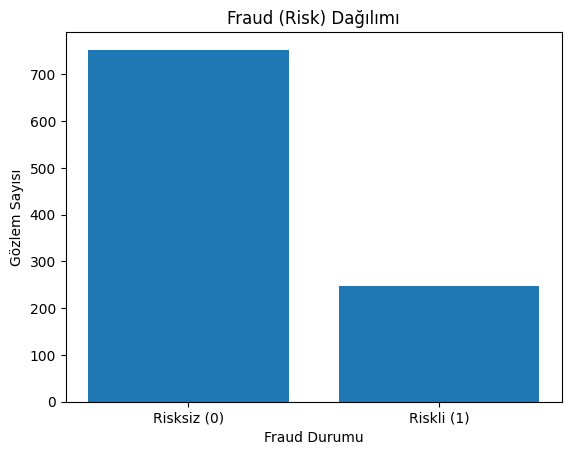

In [35]:
# Target sınıflarının sayısını alıyoruz
target_counts = df['fraud_reported'].value_counts().sort_index()

# Bar chart ile dağılımı çiziyoruz
plt.figure()
plt.bar(target_counts.index, target_counts.values)
plt.xticks([0, 1], ['Risksiz (0)', 'Riskli (1)'])
plt.xlabel("Fraud Durumu")
plt.ylabel("Gözlem Sayısı")
plt.title("Fraud (Risk) Dağılımı")
plt.show()

In [36]:
# Target sütununu feature setten çıkarıyoruz
X = df.drop('fraud_reported', axis=1)
# Tahmin etmek istediğimiz hedef değişkeni ayırıyoruz
y = df['fraud_reported']

Modelin öğrenmesini istediğimiz sonuç y değişkenidir.
Target sütununu x değişkeninden çıkartmazsak model gerçeği ezberler.
Dolayısıyla test sonucu yapay şekilde yüksek çıkar.

In [37]:
# Feature ve target boyutlarını kontrol ediyoruz
X.shape, y.shape

((1000, 38), (1000,))

Şimdi X içinde hâlâ kategorik sütunlar var.
Makine öğrenmesi modelleri sadece sayısal veri ister.
Buyüzden kategorik değişkenlerin encode edilmesi gerekir.

In [38]:
# Feature set içindeki kategorik sütunları tespit ediyoruz
categorical_cols = X.select_dtypes(include='object').columns

# Kaç tane kategorik sütun var kontrol ediyoruz
len(categorical_cols), categorical_cols

(20,
 Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'incident_date', 'incident_type',
        'collision_type', 'incident_severity', 'authorities_contacted',
        'incident_state', 'incident_city', 'incident_location',
        'property_damage', 'police_report_available', 'auto_make',
        'auto_model'],
       dtype='object'))

In [39]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturuyoruz
le = LabelEncoder()

# Her kategorik sütunu tek tek encode ediyoruz
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [40]:
# Feature setin son halini kontrol ediyoruz
X.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,940,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,635,1,1,2000,1197.22,5000000,468176,...,0,0,1,5070,780,780,3510,8,12,2007
2,134,29,687698,413,2,0,2000,1413.14,5000000,430632,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,227811,19,0,1,2000,1415.74,6000000,608117,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,367455,922,0,2,1000,1583.91,6000000,610706,...,0,1,0,6500,1300,650,4550,0,31,2009


In [41]:
# Veri tiplerini kontrol ediyoruz
X.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

In [42]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırıyoruz
# test_size=0.25  -> verinin %25'i test
# random_state=42 -> tekrar edilebilirlik
# stratify=y      -> sınıf oranlarını korumak için
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [43]:
# Train ve test setlerinde target dağılımını kontrol ediyoruz
# Train ve test oranları birbirine çok yakın olmalı
# Fraud oranı korunmuş olmalı
y_train.value_counts(normalize=True)

fraud_reported
0    0.753333
1    0.246667
Name: proportion, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

fraud_reported
0    0.752
1    0.248
Name: proportion, dtype: float64

In [46]:
#Logistic Regression’dan önce sayısal verileri ölçekleyeceğiz
from sklearn.preprocessing import StandardScaler

In [47]:
# Standartlaştırma nesnesi
scaler = StandardScaler()

In [48]:
# Eğitim verisini ölçekliyoruz
X_train_scaled = scaler.fit_transform(X_train)

In [49]:
# Test verisini aynı scaler ile dönüştürüyoruz
X_test_scaled = scaler.transform(X_test)

In [50]:
# Ölçeklenmiş veri ile Logistic Regression modeli
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [51]:
# Test seti için sınıf tahminleri alıyoruz (0 / 1)
y_pred = model_lr.predict(X_test_scaled)

In [52]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [53]:
# Confusion matrix hesaplanıyor
cm = confusion_matrix(y_test, y_pred)

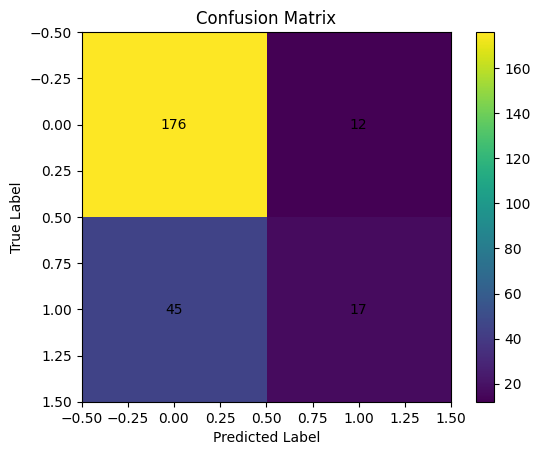

In [54]:
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

# Hücrelerin içine sayıları yazıyoruz
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Random Forest modeli oluşturuluyor
# n_estimators -> ağaç sayısı
# random_state -> sonuçların tekrarlanabilir olması için
model_rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

In [57]:
# Model eğitim verisi ile eğitiliyor
model_rf.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [58]:
# Test verisi için sınıf tahmini
y_pred_rf = model_rf.predict(X_test_scaled)

In [59]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)


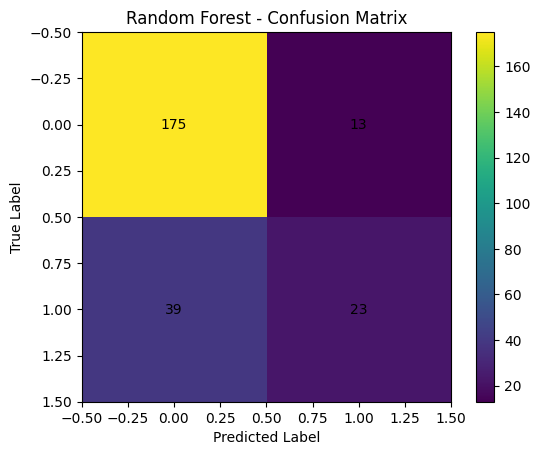

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(cm_rf)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(len(cm_rf)):
    for j in range(len(cm_rf)):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center")

plt.show()

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87       188
           1       0.64      0.37      0.47        62

    accuracy                           0.79       250
   macro avg       0.73      0.65      0.67       250
weighted avg       0.77      0.79      0.77       250



In [63]:
# Random Forest fraud olasılıkları
y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

In [64]:
# Karar eşiğini 0.3 olarak belirliyoruz
y_pred_rf_03 = (y_prob_rf >= 0.3).astype(int)

In [65]:
from sklearn.metrics import confusion_matrix

cm_rf_03 = confusion_matrix(y_test, y_pred_rf_03)


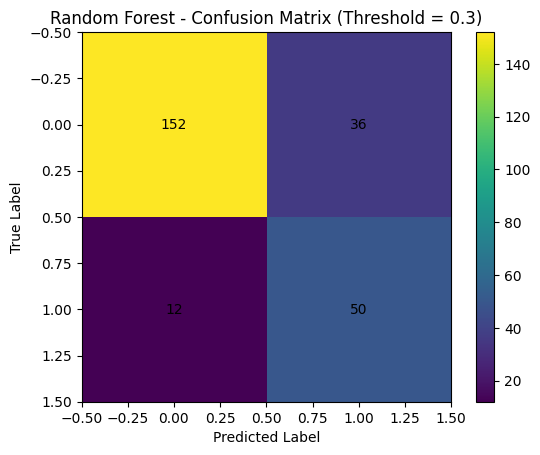

In [66]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(cm_rf_03)
plt.title("Random Forest - Confusion Matrix (Threshold = 0.3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(len(cm_rf_03)):
    for j in range(len(cm_rf_03)):
        plt.text(j, i, cm_rf_03[i, j], ha="center", va="center")

plt.show()


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_03))


              precision    recall  f1-score   support

           0       0.93      0.81      0.86       188
           1       0.58      0.81      0.68        62

    accuracy                           0.81       250
   macro avg       0.75      0.81      0.77       250
weighted avg       0.84      0.81      0.82       250



In [68]:
# Random Forest'ın her feature için hesapladığı önem değerleri
importances = model_rf.feature_importances_

In [69]:
# Feature isimlerini alıyoruz
feature_names = X.columns

In [70]:
import pandas as pd

# Feature importance tablosu oluşturuluyor
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})


In [71]:
# En önemli feature'lar üstte olacak şekilde sıralıyoruz
feature_importance_df = feature_importance_df.sort_values(
    by="importance",
    ascending=False
)


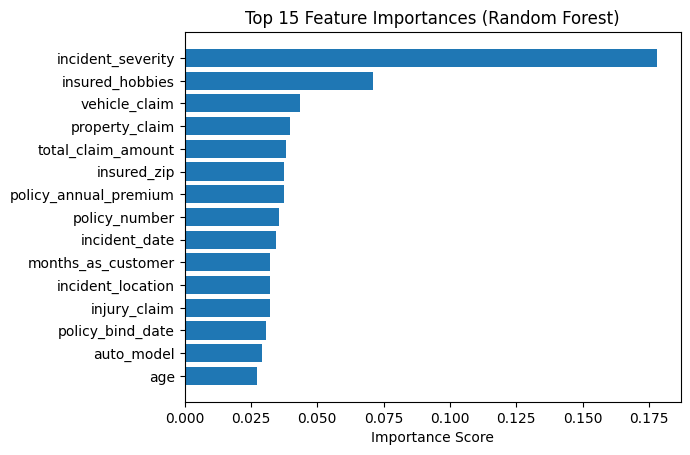

In [72]:
# İlk 15 feature seçiliyor
top_features = feature_importance_df.head(15)

plt.figure()
plt.barh(top_features["feature"], top_features["importance"])
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()  # En önemli en üstte gözüksün
plt.show()


Sigortalının hobisi, fraud kararında sık sık ayırıcı olmuş
Ama hangi hobiler?
Bunu görmek için alt kırılım analizi yapmamız gerekiyor.

In [73]:
# Hobiler ve fraud durumlarının sayımı
hobby_fraud_counts = pd.crosstab(
    df["insured_hobbies"],
    df["fraud_reported"]
)

hobby_fraud_counts


fraud_reported,0,1
insured_hobbies,,
base-jumping,36,13
basketball,28,6
board-games,34,14
bungie-jumping,47,9
camping,50,5
chess,8,38
cross-fit,9,26
dancing,38,5
exercise,46,11


In [76]:
hobby_fraud_counts.columns


Index([0, 1], dtype='int64', name='fraud_reported')

In [77]:
# Fraud oranı sütunu 1 olacak şekilde
hobby_fraud_rate = hobby_fraud_counts.div(
    hobby_fraud_counts.sum(axis=1), axis=0
)

# Fraud oranına göre sıralama
hobby_fraud_rate = hobby_fraud_rate.sort_values(by=1, ascending=False)

hobby_fraud_rate


fraud_reported,0,1
insured_hobbies,,
chess,0.173913,0.826087
cross-fit,0.257143,0.742857
yachting,0.698113,0.301887
board-games,0.708333,0.291667
polo,0.723404,0.276596
reading,0.734375,0.265625
base-jumping,0.734694,0.265306
hiking,0.769231,0.230769
paintball,0.771930,0.228070


In [81]:
# Tarih sütunlarını datetime yap
df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])
df["incident_date"] = pd.to_datetime(df["incident_date"])

# 'days since' feature ekleyelim
df["policy_bind_days"] = (pd.to_datetime("today") - df["policy_bind_date"]).dt.days
df["incident_days"] = (pd.to_datetime("today") - df["incident_date"]).dt.days


In [82]:
X = df.drop(["fraud_reported", "policy_bind_date", "incident_date"], axis=1)


In [89]:
import pandas as pd

# Feature isimleri (X_train.columns veya encode edilmiş X_train_scaled columns)
feature_names = X_train_scaled.columns if isinstance(X_train_scaled, pd.DataFrame) else X_train.columns

# DataFrame'e çevir
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

# Tüm veri için birleştir
X_all_scaled = pd.concat([X_train_scaled_df, X_test_scaled_df], axis=0)


In [90]:
df["fraud_prob"] = model_rf.predict_proba(X_all_scaled)[:, 1]

# Risk level
def assign_risk(prob):
    if prob >= 0.6:
        return "High"
    elif prob >= 0.3:
        return "Medium"
    else:
        return "Low"

df["risk_level"] = df["fraud_prob"].apply(assign_risk)

# Main risk factor
def main_risk(row):
    if row["fraud_prob"] >= 0.6:
        return row["incident_severity"]
    elif row["fraud_prob"] >= 0.3:
        return row["insured_hobbies"]
    else:
        return None

df["main_risk_factor"] = df.apply(main_risk, axis=1)

# SQL tablosu
sql_table = df[["policy_number", "fraud_prob", "risk_level", "main_risk_factor"]]
sql_table.to_csv("insurance_risk_table.csv", index=False)


C:\Users\sinem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [4]:
import pandas as pd
from sqlalchemy import create_engine

# 1) CSV dosyasını oku
df = pd.read_csv("insurance_risk_table.csv")

# 2) SQL Server bağlantısı (SENİN AYARLARINLA)
engine = create_engine(
    "mssql+pyodbc://@localhost\\SQLEXPRESS/InsuranceDB?"
    "driver=ODBC+Driver+17+for+SQL+Server&"
    "trusted_connection=yes"
)


# 3) Tabloyu SQL Server'a yaz
df.to_sql(
    name="insurance_risk",
    con=engine,
    if_exists="replace",
    index=False
)

print("✅ Tablo SQL Server'a başarıyla kaydedildi.")


✅ Tablo SQL Server'a başarıyla kaydedildi.
